# Programming Assignment - 1
---

## Question1 
Write a function trace1D() that finds the trace of a matrix given by a one dimensional NumPy array. You can not use the built-in function np.trace() or any other builtin function in any way. 

Display the output of the follwing
print(“Trace of the suggested matrix is: {}”.format(trace1D(np.arange(0,100,1))))

In [1]:
# import statements
import numpy as np
import math
import sys

# Write your function here
def trace1D(mat1D):
    array_len = mat1D.shape[0]
    print("You have provided an array of length ",array_len)
    n = math.ceil (math.sqrt(array_len))
    
    # Check if yoou have sufficient number of elements to form a square matrix
    if n > math.sqrt(array_len):
        # sys.exit(message) raises an exception too
        print("Please provide sufficient number of elements for a square matrix. System exit.")
        sys.exit()
    
    # Sum of the elements that will appear in the diagonal to give the trace
    sum = 0.0
    for k in range(n):
        sum=sum+mat1D[k*(n+1)]
    return sum
    

In [2]:
# Show the output of the following
print("Trace of the suggested matrix is: {}".format(trace1D(np.arange(0,100,1))))

You have provided an array of length  100
Trace of the suggested matrix is: 495.0


## Question 2

Read an appropriate RGB-image of your choice in a 3-D Tensor named myRGB. 

Perform the following operations on this tensor: 

(A) Pad the image by 50 pixels on all sides. This operation is akin to putting  a dark frame around the image. Display this RGB image.

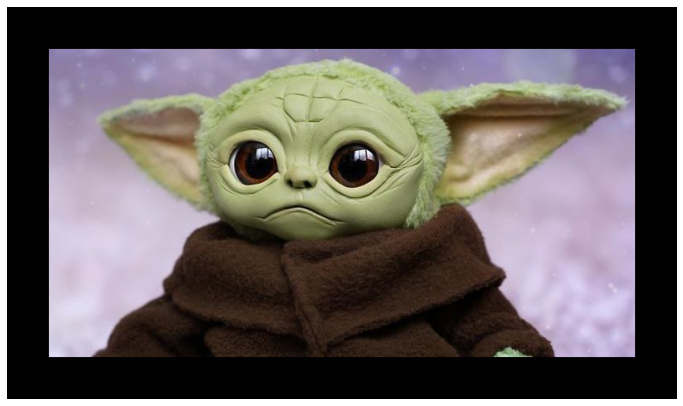

In [3]:
# Follow the example from class. Modify it to the case of color images.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

myRGB = (mpimg.imread("BabyYodaDoll.jpg"))/255 #dividing by 255 normalizes the image values


myRGB_framed = np.zeros(np.add(myRGB.shape, tuple([100,100,0])))#to get rid of depth
#[row,col,depth] - depth should be 0 because in the next part,it gives an invalid image error because it wouldnt display
#a (x,y,z) image
myRGB_framed[50:myRGB.shape[0]+50, 50:myRGB.shape[1]+50] = myRGB #adding 50 pixels to each side


plt.figure(figsize=(12,24))
plt.axis('off')
plt.imshow(myRGB_framed)
plt.show()

(B) Use a sliding window of a 3x3 matrix, K (referred to as a kernel), to perform an operation called convolution on the original image. Display some of these images after convolution. 

Note that you only need to use appropriate slicing of the source image, element wise product, and np.sum in loops to perform this. 

Display the images after convolutions using K=[1 0 -1;0 0 0;-1 0 1] and K = [0 -1 0; -1 4 -1; 0 -1 0]. Describe what these convolutions have achieved. 

To know more about convolution and how to achieve it, read Section 9.2 in https://www.deeplearningbook.org/contents/convnets.html.

Here is another resource on convolution: https://developer.apple.com/library/archive/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html

In [4]:
# Work with a B&W image from the colorimage myRGB.
myRGB = mpimg.imread("BabyYodaDoll.jpg")

myGray = np.dot(myRGB[..., 0:3], [0.2125, 0.7154, 0.0721])# Code to convert to a B&W image
# Create a padded B&W image from myRGB by padding one pixel on all sides. Why? 
#Create a pad because if we take center at (0,0) it will show an out of bounds so pad ensures all aspects of original
#image is reviewed

myGray_padded = np.zeros(np.add(myGray.shape, tuple([2,2])))
myGray_padded[1:myGray.shape[0]+1, 1:myGray.shape[1]+1]=myGray# Do it on myGray a B&W image

# If the convoluted image is named myGray_conv, initialize it.
myGray_conv1 = np.zeros_like(myGray)
myGray_conv2=myGray_conv1.copy()

# Python code for convolution that needs modification by you.
m,n=myGray.shape # Find dimension of the image
K1= np.array([[0,-1,0], [-1,4,-1],[0,-1,0]])# Take appropriate Kernel
K2=np.array([[1,0,-1],[0,0,0],[-1,0,1]])

for i in range(m):
    for j in range(n):
        # Take appropriate slice of myRGB_padded to get a (3x3) window on the image
        myGray_window =  myGray_padded[i:i+3,j:j+3]# Your code here
        # CODE for finding the i,j-th pixel on the convoluted image
        myGray_conv1[i,j] = np.sum(myGray_window*K1)
        myGray_conv2[i,j]=np.sum(myGray_window*K2)
# Display the convoluted image

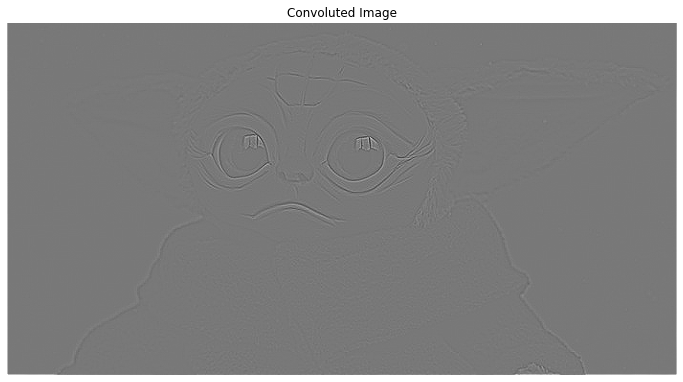

In [5]:
plt.figure(figsize=(12,24))
plt.axis('off')
plt.imshow(myGray_conv1,cmap='gray')
plt.title('Convoluted Image')
plt.show()

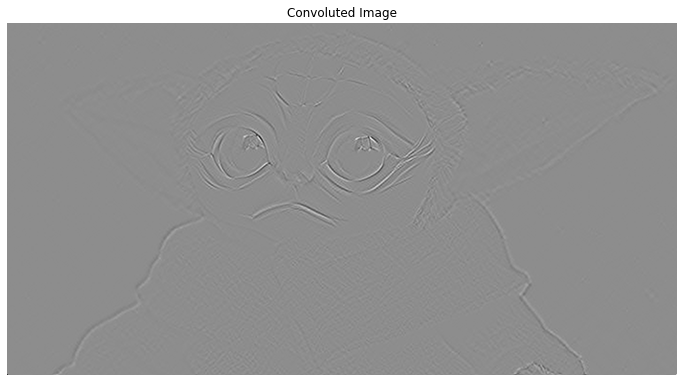

In [6]:
plt.figure(figsize=(12,24))
plt.axis('off')
plt.imshow(myGray_conv2,cmap='gray')
plt.title('Convoluted Image')
plt.show()

In [7]:
Your Observations?
#The first image shows only the edges of the pictures, so the frame of Yoda but nothing in the background
#The second image shows a blurry effect of the edges

Object `Observations` not found.
